# TMDB movies

Load all the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md


Load the dataset into a DataFrame and inspect the first rows of the DataFrame.

In [2]:
df = pd.read_csv("TMDB-movies-small.csv")
df.head()

,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,...,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer
0,11,16,Dancer in the Dark,7.868,1697,Released,2000-09-01,40061153.0,140,12500000.0,...,"Drama, Crime","Lantia Cinema & Audiovisivi, Fine Line Feature...","Argentina, Denmark, Finland, France, Germany, ...",English,"Bobo Eriksson, Caroline Sascha Cogez, Bo Weste...",Lars von Trier,Robby Müller,"Sjón, Lars von Trier","Leo Pescarolo, Peter Aalbæk Jensen, Vibeke Win...",Björk
1,26,55,Amores Perros,7.600,2475,Released,2000-06-16,20908467.0,154,2000000.0,...,"Drama, Thriller","Altavista Films, Zeta Film",Mexico,Español,"Gerardo Campbell, Rosa María Bianchi, Ricardo ...",Alejandro González Iñárritu,Rodrigo Prieto,Guillermo Arriaga,"Martha Sosa Elizondo, Francisco González Compe...",Gustavo Santaolalla
2,31,64,Talk to Her,7.579,1233,Released,2002-03-15,64803131.0,112,0.0,...,"Drama, Romance","Vía Digital, Good Machine, El Deseo, Atresmedia",Spain,Español,"Carlos García Cambero, Leonor Watling, Pina Ba...",Pedro Almodóvar,Javier Aguirresarobe,Pedro Almodóvar,"Michel Ruben, Agustín Almodóvar","Alberto Iglesias, Vicente Amigo"
3,32,65,8 Mile,7.134,6958,Released,2002-11-08,242875078.0,111,41000000.0,...,"Drama, Music","Mikona Productions, Imagine Entertainment","Germany, United States of America",English,"Malik Barnhardt, Mike Bell, Allen Adams, Abdul...",Curtis Hanson,Rodrigo Prieto,Scott Silver,"Jimmy Iovine, Jim Whitaker, Brian Grazer, Greg...",NaN
4,38,71,Billy Elliot,7.600,3691,Released,2000-09-28,109280263.0,110,5000000.0,...,"Drama, Comedy, Music","StudioCanal, BBC Film, Tiger Aspect, Arts Coun...","France, United Kingdom, United States of America",English,"Lee Williams, Colin MacLachlan, Neil North, Pa...",Stephen Daldry,Brian Tufano,Lee Hall,"Jonathan Finn, Natascha Wharton, Tessa Ross, D...",Stephen Warbeck


Create a new DataFrame with all the movies released in 2000. Tip: Format the release dates as pandas datetime objects. Inspect the amount of rows in the new DataFrame.

The .dt accessor in pandas is a convenient way to access the datetime properties of a Series with datetime values. When you have a Series of datetime objects (e.g., after converting a column to datetime using pd.to_datetime()), the .dt accessor allows you to extract various datetime components such as the year, month, day, hour, minute, second, and many more.

Here are some common attributes and methods you can access through the .dt accessor:

    Attributes:
        df['release_date'].dt.year: Extracts the year.
        df['release_date'].dt.month: Extracts the month.
        df['release_date'].dt.day: Extracts the day.
        df['release_date'].dt.hour: Extracts the hour.
        df['release_date'].dt.minute: Extracts the minute.
        df['release_date'].dt.second: Extracts the second.
        df['release_date'].dt.weekday: Extracts the day of the week (0=Monday, 6=Sunday).
        df['release_date'].dt.dayofyear: Extracts the day of the year.
        df['release_date'].dt.quarter: Extracts the quarter of the year.

    Methods:
        df['release_date'].dt.strftime('%Y-%m-%d'): Formats the datetime objects as strings.
        df['release_date'].dt.normalize(): Normalizes the time to midnight.
        df['release_date'].dt.floor('D'): Floors the dates to the nearest day.
        df['release_date'].dt.ceil('D'): Ceils the dates to the nearest day.
        df['release_date'].dt.round('H'): Rounds the dates to the nearest hour.

In [9]:
from datetime import datetime
from dateutil.parser import parse

# convert the date column to a datetime object
df['release_date'] = pd.to_datetime(df['release_date'])

df_released_in_2000 = df[df['release_date'].dt.year == 2000]

df_released_in_2000

,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,...,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer
0,11,16,Dancer in the Dark,7.868,1697,Released,2000-09-01,40061153.0,140,12500000.0,...,"Drama, Crime","Lantia Cinema & Audiovisivi, Fine Line Feature...","Argentina, Denmark, Finland, France, Germany, ...",English,"Bobo Eriksson, Caroline Sascha Cogez, Bo Weste...",Lars von Trier,Robby Müller,"Sjón, Lars von Trier","Leo Pescarolo, Peter Aalbæk Jensen, Vibeke Win...",Björk
1,26,55,Amores Perros,7.600,2475,Released,2000-06-16,20908467.0,154,2000000.0,...,"Drama, Thriller","Altavista Films, Zeta Film",Mexico,Español,"Gerardo Campbell, Rosa María Bianchi, Ricardo ...",Alejandro González Iñárritu,Rodrigo Prieto,Guillermo Arriaga,"Martha Sosa Elizondo, Francisco González Compe...",Gustavo Santaolalla
4,38,71,Billy Elliot,7.600,3691,Released,2000-09-28,109280263.0,110,5000000.0,...,"Drama, Comedy, Music","StudioCanal, BBC Film, Tiger Aspect, Arts Coun...","France, United Kingdom, United States of America",English,"Lee Williams, Colin MacLachlan, Neil North, Pa...",Stephen Daldry,Brian Tufano,Lee Hall,"Jonathan Finn, Natascha Wharton, Tessa Ross, D...",Stephen Warbeck
5,43,77,Memento,8.184,14320,Released,2000-10-11,40000000.0,113,9000000.0,...,"Mystery, Thriller","Summit Entertainment, Newmarket Capital Group,...",United States of America,English,"Carrie-Anne Moss, Callum Keith Rennie, Jorja F...",Christopher Nolan,Wally Pfister,"Jonathan Nolan, Christopher Nolan","Jennifer Todd, Suzanne Todd, Aaron Ryder",David Julyan
8,63,98,Gladiator,8.200,17788,Released,2000-05-04,465361176.0,155,103000000.0,...,"Action, Drama, Adventure","Universal Pictures, Scott Free Productions, Re...","United Kingdom, United States of America",English,"Brian Smyj, Russell Crowe, John Shrapnel, Paul...",Ridley Scott,John Mathieson,"William Nicholson, David Franzoni, John Logan","Walter F. Parkes, Branko Lustig, Ridley Scott,...","Lisa Gerrard, Hans Zimmer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9376,868959,1215684,Jerusalem: The Covenant City,5.000,1,Released,2000-04-09,0.0,107,1000000.0,...,"Documentary, History","Lance Lambert Ministries, Vision Video",United States of America,English,"Gershon Salomon, Roger Climpson, Lance Lambert",Hugh Kitson,NaN,Hugh Kitson,"Hugh Kitson, Lance Lambert",NaN
9385,881800,1231307,In the Shadow of the Vampire: The Making of In...,6.000,1,Released,2000-01-01,0.0,30,0.0,...,Documentary,NaN,United States of America,English,"Stan Winston, Anne Rice, Kirsten Dunst, Stephe...",NaN,NaN,NaN,NaN,NaN
9386,885541,1235872,In love with a naughty gold princess,8.000,1,Released,2000-10-28,0.0,52,0.0,...,Romance,Shintoho Company,Japan,日本語,"Yôko Satomi, Hiroyuki Kawasaki, Mayuko Sasaki,...",Akira Fukamachi,NaN,NaN,NaN,NaN
9388,888337,1239240,Love,8.000,1,Released,2000-01-01,0.0,6,0.0,...,Animation,"Studio """"Shar""""",Russia,Pусский,NaN,Agamurad Amanov,NaN,NaN,NaN,NaN


Create a new DataFrame df_topmovies which only incorporates the rows with the movies of the year 2000 who get an average score of at least 9. Compare the total rows of the original dataframe with df_topmovies. (Tip: use shape)

In [13]:
df_topmovies = df_released_in_2000[df_released_in_2000['vote_average'] >= 9]
print("Original total rows: ", df.shape, "\nFiltered total rows: ", df_topmovies.shape)

Original total rows:  (9392, 26) 
Filtered total rows:  (185, 26)


Replace all NaN's with 0.

In [14]:
p = df.fillna(0)
p

,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,...,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer
0,11,16,Dancer in the Dark,7.868,1697,Released,2000-09-01,40061153.0,140,12500000.0,...,"Drama, Crime","Lantia Cinema & Audiovisivi, Fine Line Feature...","Argentina, Denmark, Finland, France, Germany, ...",English,"Bobo Eriksson, Caroline Sascha Cogez, Bo Weste...",Lars von Trier,Robby Müller,"Sjón, Lars von Trier","Leo Pescarolo, Peter Aalbæk Jensen, Vibeke Win...",Björk
1,26,55,Amores Perros,7.600,2475,Released,2000-06-16,20908467.0,154,2000000.0,...,"Drama, Thriller","Altavista Films, Zeta Film",Mexico,Español,"Gerardo Campbell, Rosa María Bianchi, Ricardo ...",Alejandro González Iñárritu,Rodrigo Prieto,Guillermo Arriaga,"Martha Sosa Elizondo, Francisco González Compe...",Gustavo Santaolalla
2,31,64,Talk to Her,7.579,1233,Released,2002-03-15,64803131.0,112,0.0,...,"Drama, Romance","Vía Digital, Good Machine, El Deseo, Atresmedia",Spain,Español,"Carlos García Cambero, Leonor Watling, Pina Ba...",Pedro Almodóvar,Javier Aguirresarobe,Pedro Almodóvar,"Michel Ruben, Agustín Almodóvar","Alberto Iglesias, Vicente Amigo"
3,32,65,8 Mile,7.134,6958,Released,2002-11-08,242875078.0,111,41000000.0,...,"Drama, Music","Mikona Productions, Imagine Entertainment","Germany, United States of America",English,"Malik Barnhardt, Mike Bell, Allen Adams, Abdul...",Curtis Hanson,Rodrigo Prieto,Scott Silver,"Jimmy Iovine, Jim Whitaker, Brian Grazer, Greg...",0
4,38,71,Billy Elliot,7.600,3691,Released,2000-09-28,109280263.0,110,5000000.0,...,"Drama, Comedy, Music","StudioCanal, BBC Film, Tiger Aspect, Arts Coun...","France, United Kingdom, United States of America",English,"Lee Williams, Colin MacLachlan, Neil North, Pa...",Stephen Daldry,Brian Tufano,Lee Hall,"Jonathan Finn, Natascha Wharton, Tessa Ross, D...",Stephen Warbeck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9387,885549,1235881,"Unfaithful wife, sticky and messy",6.000,1,Released,2002-04-26,0.0,47,0.0,...,Romance,Shintoho Company,Japan,日本語,"Tomohiro Okada, Yasuhiro Asai, Yohta Kawase, Y...",Akira Fukamachi,0,Teruo Oka,0,0
9388,888337,1239240,Love,8.000,1,Released,2000-01-01,0.0,6,0.0,...,Animation,"Studio """"Shar""""",Russia,Pусский,0,Agamurad Amanov,0,0,0,0
9389,892747,1244331,El insan we al fnar,8.000,1,Released,2002-01-01,0.0,24,0.0,...,0,0,0,العربية,0,Mohsen Sabry,0,0,0,0
9390,896385,1248655,Dog's Home,9.000,1,Released,2000-10-01,0.0,85,0.0,...,Drama,Filmmaker Features LLC,0,български език,"Georgi Kurkelanov, Nikolai Binev, Dossio Dosse...",Stephan Komandarev,Vladimir Mihaylov,Yurii Dachev,Christopher Bojilov,0


Plot the data using a graph with on the x-axis the release dates and on the y-axis the runtime of the film.
* Use appropriate labels and titles
* Change the ticks and tick labels so every month has a tick and as label the abbreviation of the month (Jan, Feb, March etc.)
* Change the color of the graph
* Show a grid
* Show the legend

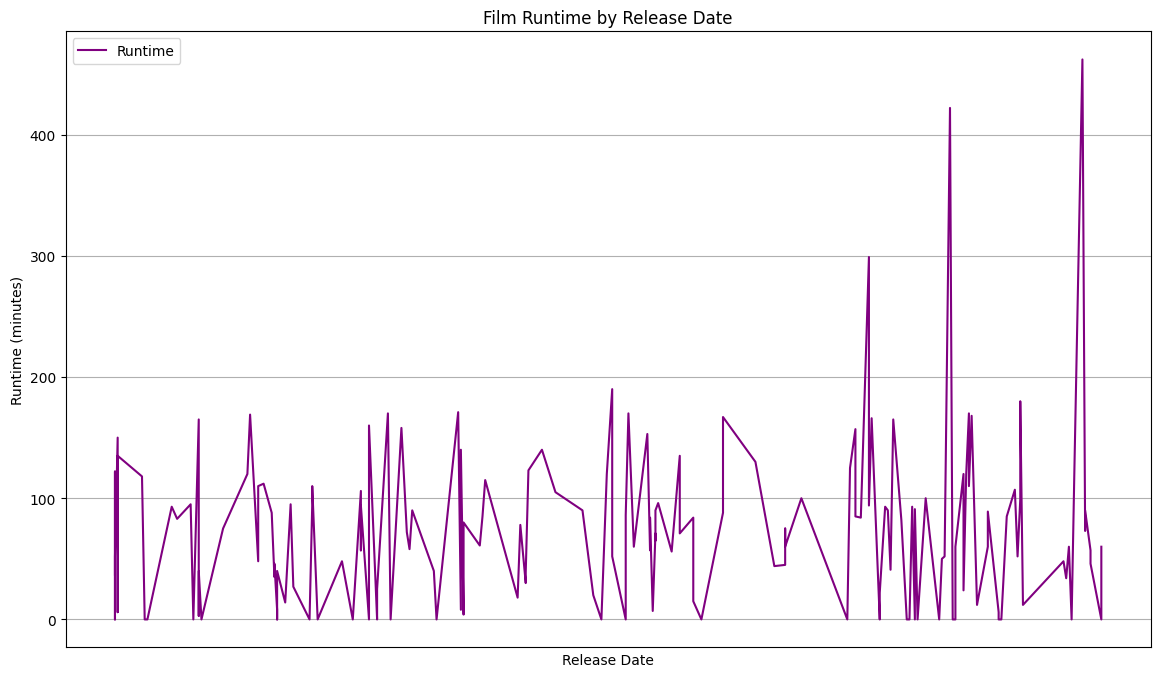

In [20]:
import matplotlib.ticker as ticker

# Sort the DataFrame by 'release_date'
df_sorted_by_date = df_topmovies.sort_values(by='release_date')

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df_sorted_by_date['release_date'], df_sorted_by_date['runtime'], color='purple', label='Runtime')

# Adding labels and title
ax.set_xlabel('Release Date')
ax.set_ylabel('Runtime (minutes)')
ax.set_title('Film Runtime by Release Date')

# AutoLocator for automatic tick placement
al = ticker.AutoLocator()
ax.xaxis.set_major_locator(al)
ax.xaxis.set_minor_locator(al)
ax.yaxis.set_major_locator(al)
ax.yaxis.set_minor_locator(al)

# FuncFormatter for formatting the x-ticks as month abbreviations
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: pd.to_datetime(x).strftime('%b') if not pd.isna(x) else ''))

# Optional: Set the y-tick labels to use engineering notation (if needed)
ef = ticker.EngFormatter()
ax.yaxis.set_major_formatter(ef)

# Show a grid
ax.grid(True)

# Show the legend
ax.legend()

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()
